<h1>Machine Learning</h1>


Import Libraries and Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("/content/Project Management Dataset.csv")


#from google.colab import files
#uploaded=files.upload()
#df=pd.read_csv("/content/Project Management Dataset.csv")
#print(df.head())

Print first 5 and last 5 data

In [ ]:
print(data.head())
print(data.tail())

#if we want more rows type data.head(20) or data.tail(20)

                Project Name  \
0                 Rhinestone   
1     A Triumph Of Softwares   
2              The Blue Bird   
3  Remembering Our Ancestors   
4                   Skyhawks   

                                 Project Description  \
0  Associations Now Is A Casual Game To Teach You...   
1  Is A Fully Managed Content Marketing Software ...   
2  Most Content Marketers Know The Golden Rule: Y...   
3  Utilize And Utilizes (Verb Form) The Open, Inc...   
4  Is A Solution For Founders Who Want To Win At ...   

                  Project Type  Project Manager Region           Department  \
0            INCOME GENERATION      Yael Wilcox  North           Admin & BI   
1            INCOME GENERATION  Brenda Chandler   West            eCommerce   
2            INCOME GENERATION    Nyasia Hunter  North            Warehouse   
3          PROCESS IMPROVEMENT  Brenda Chandler   East  Sales and Marketing   
4  WORKING CAPITAL IMPROVEMENT  Jaylyn Mckenzie   East            eCommerce

In [ ]:
#To check the data type of each column

print(data.dtypes)

Project Name           object
Project Description    object
Project Type           object
Project Manager        object
Region                 object
Department             object
 Project Cost          object
 Project Benefit       object
Complexity             object
Status                 object
Completion%            object
Phase                  object
Year                    int64
Month                   int64
Start Date             object
End Date               object
dtype: object


In [ ]:
#counts null values in each column, highlighting any missing values

print(data.isnull().sum())

Project Name           0
Project Description    0
Project Type           0
Project Manager        0
Region                 0
Department             0
 Project Cost          0
 Project Benefit       0
Complexity             0
Status                 0
Completion%            0
Phase                  0
Year                   0
Month                  0
Start Date             0
End Date               0
dtype: int64


In [ ]:
#Provides summary statistics for numerical columns, offering insights into distribution, central tendency and variability.

print(data.describe())

              Year      Month
count    99.000000  99.000000
mean   2022.747475   7.151515
std       1.402210   3.211471
min    2021.000000   1.000000
25%    2022.000000   4.500000
50%    2022.000000   7.000000
75%    2024.000000  10.000000
max    2025.000000  12.000000


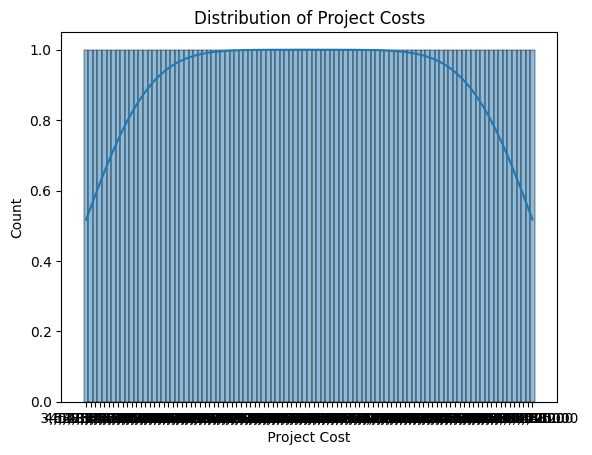

In [ ]:
#visualizes the distribution of project costs, identifying skewness, outliers, and the general cost range
#skewness- measure of deviation from symmetry
#KPI- Key Performance Indicator --

sns.histplot(data=data,x=' Project Cost ',kde=True)
plt.title("Distribution of Project Costs")
plt.show()

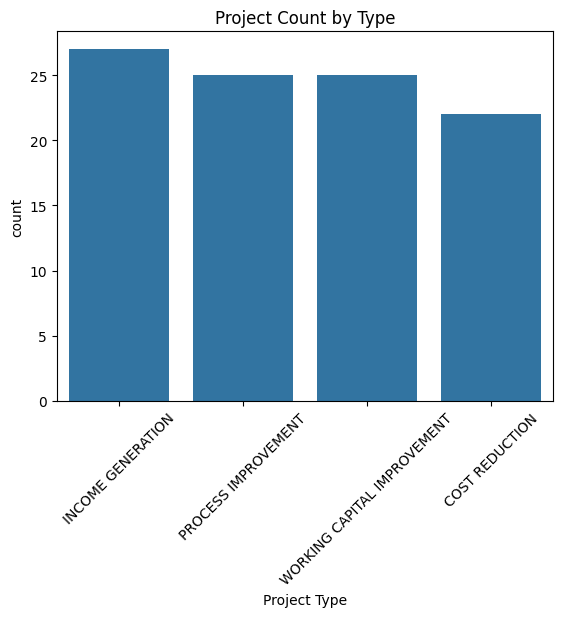

In [ ]:
#Project count by type

sns.countplot(data=data,x='Project Type')
plt.xticks(rotation=45)#To specify the angle of x labels
plt.title("Project Count by Type")
plt.show()

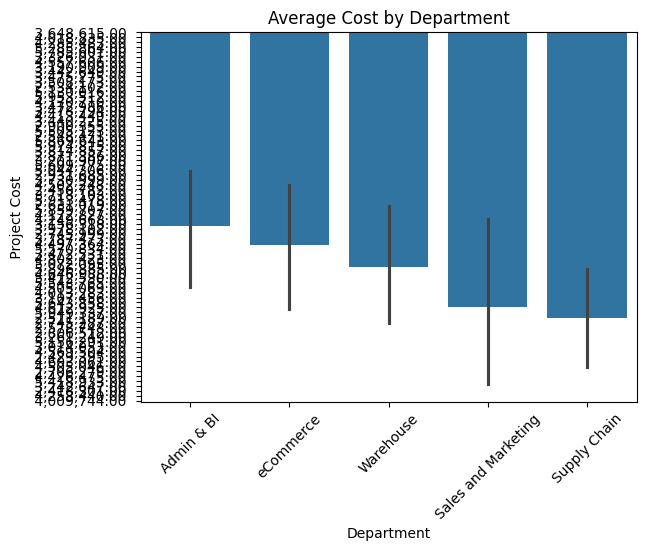

In [ ]:
#Average Cost by Department

sns.barplot(data=data,x='Department',y=' Project Cost ',estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average Cost by Department")
plt.show()

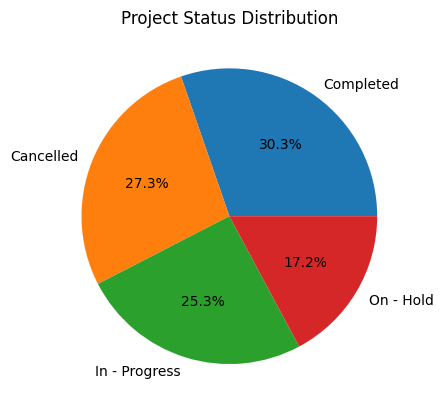

In [ ]:
#Project Status Distribution

plt.pie(data['Status'].value_counts(),labels=data['Status'].value_counts().index,autopct='%1.1f%%')
plt.title("Project Status Distribution")
plt.show()

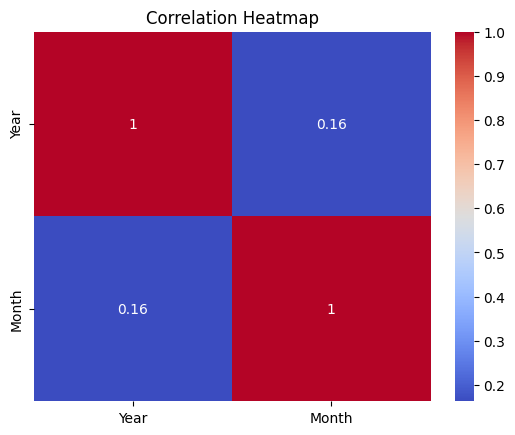

In [ ]:
#correlation heatmap
#Heatmap - highlight the areas that are more correlated

corr=(data.select_dtypes(include=['int', 'float'])).corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

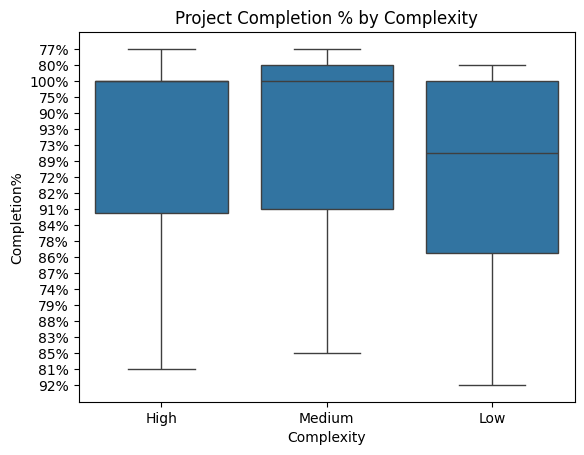

In [ ]:
#Project Completion % by Complexity

sns.boxplot(data=data,x='Complexity',y='Completion%',showfliers=False)
plt.title("Project Completion % by Complexity")
plt.show()

In [ ]:
#Time Series Analysis of Project Costs

data['Year-Month']=data['Year'].astype(str)+'-'+data['Month'].astype(str)
data.groupby('Year-Month')[' Project Cost '].sum().plot()
plt.title("Montly Project Costs over Time")
plt.xticks(rotation=45)
plt.show()

TypeError: no numeric data to plot

                 Project Name  \
0                  Rhinestone   
1      A Triumph Of Softwares   
2               The Blue Bird   
3   Remembering Our Ancestors   
4                    Skyhawks   
..                        ...   
94            Strive Training   
95               Debug Entity   
96                 Made By Me   
97                 Revolution   
98        7Th Annual Workshop   

                                  Project Description  \
0   Associations Now Is A Casual Game To Teach You...   
1   Is A Fully Managed Content Marketing Software ...   
2   Most Content Marketers Know The Golden Rule: Y...   
3   Utilize And Utilizes (Verb Form) The Open, Inc...   
4   Is A Solution For Founders Who Want To Win At ...   
..                                                ...   
94  Was Built To Help Founders Create Optimized Co...   
95  In This Ecosystem, Association Content Is Simp...   
96  With 15 Five, We Take The Guesswork Out Of Con...   
97  Was Founded To Help Founders 

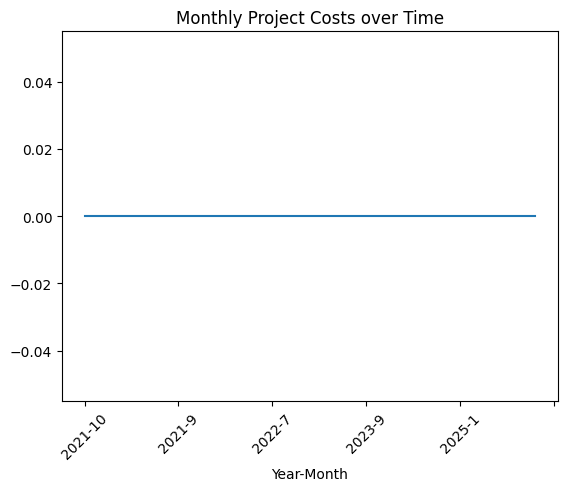

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame containing project cost information

# Step 1: Identify non-numeric characters
non_numeric_values = data[' Project Cost '].str.contains(r'[^0-9.]', na=False)

# Print rows with non-numeric characters
print(data[non_numeric_values])

# Step 2: Remove non-numeric characters and convert to numeric type
data[' Project Cost '] = pd.to_numeric(data[' Project Cost '].str.replace(r'[^0-9.]', ''), errors='coerce')

# Check for any errors during conversion
if data[' Project Cost '].isnull().any():
    print("There are errors in the 'Project Cost' column after conversion.")

# Group by 'Year-Month' and sum the 'Project Cost'
data.groupby('Year-Month')[' Project Cost '].sum().plot()
plt.title("Monthly Project Costs over Time")
plt.xticks(rotation=45)
plt.show()
